In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# define resolution of all figures:
dpi = 2000
lower_dpi = 1500

In [3]:
with open('/mbshome/nvelthuijs/Cofactors/20200402_Transcriptionregulationlist/Output_files/16_Transcription_regulatorlist_baitset3_with_scores_with_blacklist.csv') as list_file:
    list_df = pd.read_csv(list_file)

list_df.head()

,Gene Symbol,UniProt ID,ENSG ID,ComplexID_huMAP,Bait_huMAP,ComplexID_CORUM,ComplexName_CORUM,PMID_CORUM,Bait_CORUM,ComplexName_nvs,...,Total GO score,Total GO score penalty,GO score,Mine score,Final score,Blacklist ribosome,Blacklist spliceosome,Blacklist proteasome,Blacklist any,Is_GTF
0,AATF,Q9NY61,ENSG00000275700,Drew1337;Drew1809;Drew3735,RIOX1;ZNF629;DHX30;ZBTB24;ZBTB11;MYBBP1A;PURA;...,NaN,NaN,NaN,NaN,NaN,...,3.072727,-5,-0.642424,3,2.357576,0,0,0,0,0
1,ABL1,P00519,ENSG00000097007,Drew2259,ABL1,6592;6076;2811,c-Abl-cortactin-nmMLCK complex;BRCA1-cABL comp...,20861316;12024016;23740246,BRCA1;ABL1,NaN,...,4.171591,0,1.390530,5,6.390530,0,0,0,0,0
2,ABRAXAS1,Q6UWZ7,ENSG00000163322,Drew1841,UIMC1,2786,BRCA1 A complex,17525340,BRCA1;UIMC1,NaN,...,1.747727,-8,-2.084091,2,-0.084091,0,0,0,0,0
3,ACIN1,Q9UKV3,ENSG00000100813,Drew2802;Drew4295;Drew1090,SRSF2;SPEN;RBM39;THRAP3;BCLAF1;CDC73,351;760,Spliceosome;Apoptosis- and splicing-associated...,12226669;12665594,DDX5;SRSF2;DHX9;SPEN;BCAS2;SF1;SAP18;DDX17;SNW...,NaN,...,1.747727,-10,-2.750758,2,-0.750758,0,0,0,0,0
4,ACOT1,Q86TX2,ENSG00000184227,Drew956,TFAP2A,NaN,NaN,NaN,NaN,NaN,...,0.000000,-9,-3.000000,2,-1.000000,0,0,0,0,0


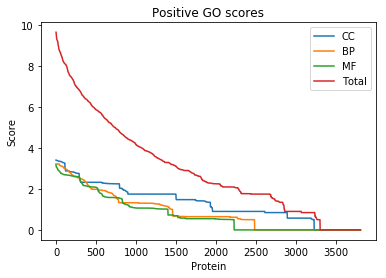

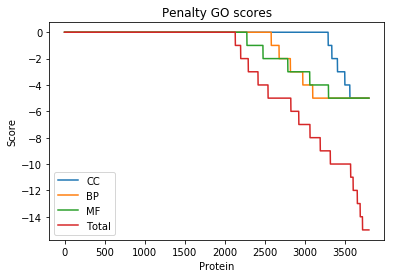

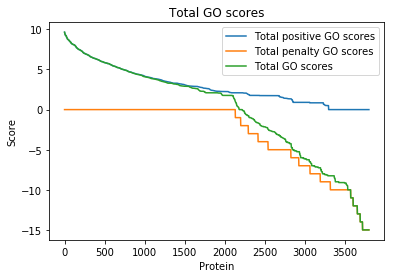

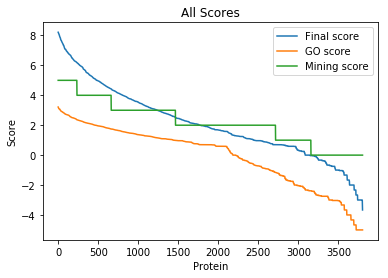

In [4]:
for x in ['CC', 'BP', 'MF', 'Total']:
    plt.xlabel('Protein')
    plt.ylabel('Score')
    plt.title('Positive GO scores')
    list_scores = list(list_df['{} GO score'.format(x)])
    list_scores.sort(reverse = True)
    plt.plot([x for x in range(len(list_scores))], list_scores)
plt.legend(['CC', 'BP', 'MF', 'Total'])
plt.savefig('Figures/001_Positive_GO_scores_lineplot.jpg', dpi = dpi)
plt.show()

for x in ['CC', 'BP', 'MF', 'Total']:
    plt.xlabel('Protein')
    plt.ylabel('Score')
    plt.title('Penalty GO scores')
    list_scores = list(list_df['{} GO score penalty'.format(x)])
    list_scores.sort(reverse = True)
    plt.plot([x for x in range(len(list_scores))], list_scores)
plt.legend(['CC', 'BP', 'MF', 'Total'])
plt.savefig('Figures/002_Penalty_GO_scores_lineplot.jpg', dpi = dpi)
plt.show()
    
plt.xlabel('Protein')
plt.ylabel('Score')
plt.title('Total GO scores')
list_scores = list(list_df['Total GO score'])
list_scores.sort(reverse = True)
plt.plot([x for x in range(len(list_scores))], list_scores)
list_scores = list(list_df['Total GO score penalty'.format(x)])
list_scores.sort(reverse = True)
plt.plot([x for x in range(len(list_scores))], list_scores)
list_scores = list(list_df['GO score'])
list_scores = [x * 3 for x in list_scores]
list_scores.sort(reverse = True)
plt.plot([x for x in range(len(list_scores))], list_scores)
plt.legend(['Total positive GO scores', 'Total penalty GO scores', 'Total GO scores'])
plt.savefig('Figures/003_All_GO_scores_lineplot.jpg', dpi = dpi)
plt.show()

plt.xlabel('Protein')
plt.ylabel('Score')
plt.title('All Scores')
list_scores = list(list_df['Final score'])
list_scores.sort(reverse = True)
plt.plot([x for x in range(len(list_scores))], list_scores)
list_scores = list(list_df['GO score'])
list_scores.sort(reverse = True)
plt.plot([x for x in range(len(list_scores))], list_scores)
list_scores = list(list_df['Mine score'])
list_scores.sort(reverse = True)
plt.plot([x for x in range(len(list_scores))], list_scores)
plt.legend(['Final score', 'GO score', 'Mining score'])
plt.savefig('Figures/004_GO_mining_total_scores_lineplot.jpg', dpi = dpi)
plt.show()

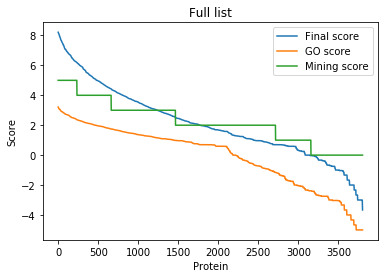

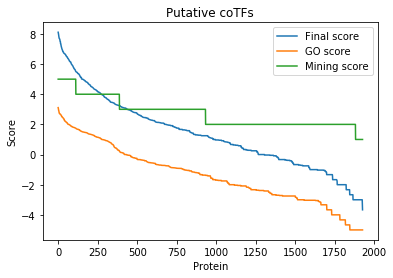

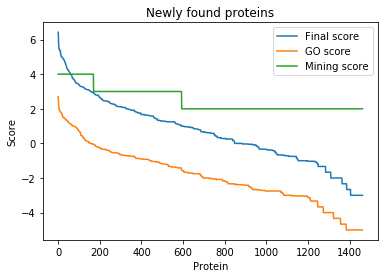

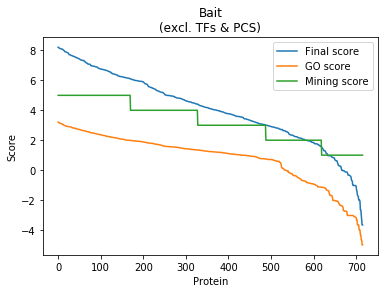

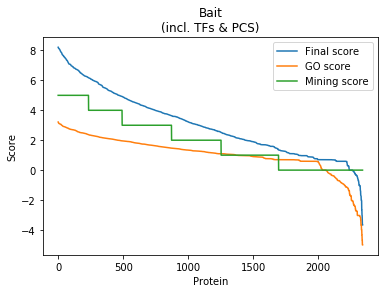

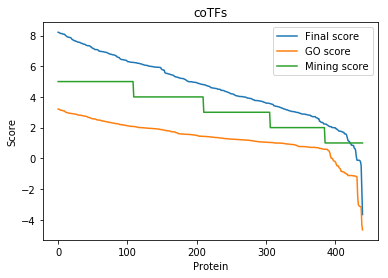

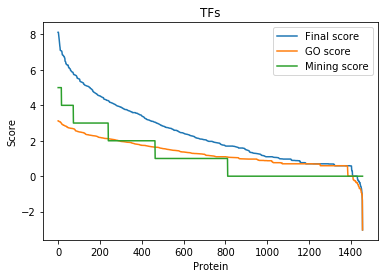

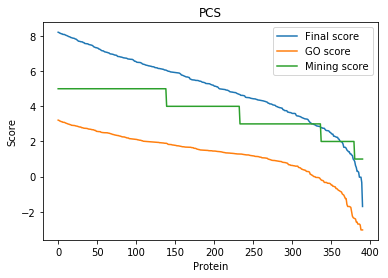

In [5]:
def lineplot_scores(df, plot_title, n):
    """
    Takes a df which is a subset of the full list of 3735 proteins.
    Sorts the GO-, mine- and total scores, and plots those.
    """
    
    final_score = list(df['Final score'])
    final_score.sort(reverse = True)
    
    go_score = list(df['GO score'])
    go_score.sort(reverse = True)
    
    mine_score = list(df['Mine score'])
    mine_score.sort(reverse = True)
    
    plt.plot([x for x in range(len(final_score))], final_score)
    plt.plot([x for x in range(len(go_score))], go_score)
    plt.plot([x for x in range(len(mine_score))], mine_score)
    
    plt.xlabel('Protein')
    plt.ylabel('Score')
    plt.title(plot_title)
    plt.legend(['Final score', 'GO score', 'Mining score'])
    
    n = str(n)
    if len(n) < 3:
        n = '0' * (3 - len(n)) + str(n)
    plt.savefig('Figures/{}_subset_{}_GO_mining_full_scores_lineplot.jpg'.format(n, plot_title), dpi = dpi)
    plt.show()
    return None

subdfs = (
    list_df,
    list_df.loc[(list_df['In_bait_gocofs'] == 0) & (list_df['Is_TF'] == 0)],
    list_df.loc[((list_df['In_bait_crems'] == 0) &
                (list_df['In_bait_snfs'] == 0) &
                (list_df['In_bait_nursa'] == 0) &
                (list_df['In_bait_gocofs'] == 0) &
                (list_df['Is_TF'] == 0) &
                (list_df['In_NVS'] == 0)
                )],
    list_df.loc[((list_df['In_bait_crems'] == 1) |
                (list_df['In_bait_snfs'] == 1) |
                (list_df['In_bait_nursa'] == 1) |
                (list_df['In_bait_gocofs'] == 1)
                )],
    list_df.loc[((list_df['In_bait_crems'] == 1) |
                (list_df['In_bait_snfs'] == 1) |
                (list_df['In_bait_nursa'] == 1) |
                (list_df['In_bait_gocofs'] == 1) |
                (list_df['Is_TF'] == 1) |
                (list_df['In_NVS'] == 1)
                )],
#     list_df.loc[list_df['In_bait_crems'] == 1],
#     list_df.loc[list_df['In_bait_snfs'] == 1],
#     list_df.loc[list_df['In_bait_nursa'] == 1],
    list_df.loc[list_df['In_bait_gocofs'] == 1],
    list_df.loc[list_df['Is_TF'] == 1],
    list_df.loc[list_df['In_NVS'] == 1]
)

titles = (
    'Full list',
    'Putative coTFs',
    'Newly found proteins',
    'Bait\n(excl. TFs & PCS)',
    'Bait\n(incl. TFs & PCS)',
#     'CREMs',
#     'SNF2s',
#     'NURSA',
    'coTFs',
    'TFs',
    'PCS'
)

for index, (subdf, title) in enumerate(zip(subdfs, titles)):
    lineplot_scores(subdf, title, index + 5)

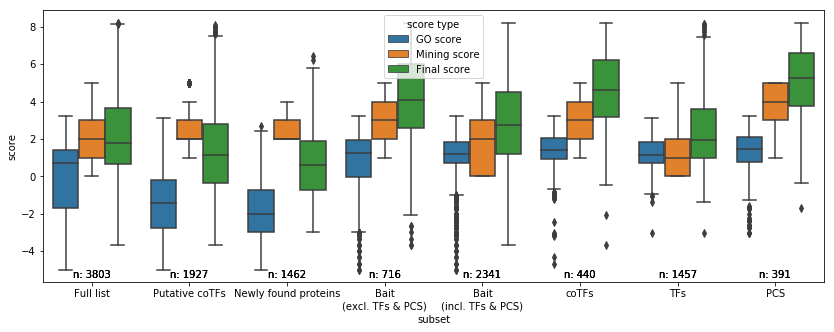

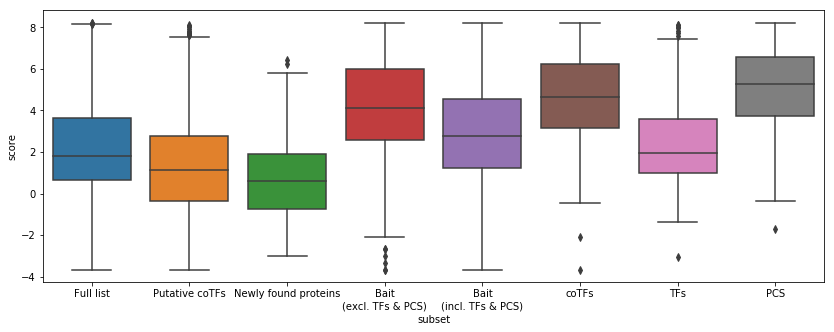

In [6]:
def subset_minimalize_add_idd(subdf, subset_name):
    subdf = subdf.loc[:, ['GO score', 'Mine score', 'Final score']]
    subdf['subset'] = subset_name
    gos = subdf.loc[:,['GO score', 'subset']]
    mines = subdf.loc[:,['Mine score', 'subset']]
    finals = subdf.loc[:,['Final score', 'subset']]
    for df, name in zip([gos, mines, finals], ['GO score', 'Mining score', 'Final score']):
        df['score type'] = name
        df.columns = ['score', 'subset', 'score type']
    outdf = pd.concat([gos, mines, finals])
    return outdf

subdfs_minimal = [subset_minimalize_add_idd(subdf, title) for subdf, title in zip(subdfs, titles)]
all_scores = pd.concat(subdfs_minimal)
plt.figure(figsize = (14, 5))
ax = sns.boxplot(x = 'subset', y = 'score', data = all_scores, hue = 'score type')
nobs_groupby = all_scores.groupby(['subset', 'score type'])
nobs = nobs_groupby.apply(lambda x: 'n: {}'.format(len(x)))
medians = nobs_groupby['score'].median()

for tick, label in enumerate(ax.get_xticklabels()):
    ax_subset = label.get_text()
    
    for j, ax_scoretype in enumerate(ax.get_legend_handles_labels()[1]):
        num = nobs.get(ax_subset).get(ax_scoretype)
        ax.text(tick, -5.4, num,
                    horizontalalignment='center', color='black')
plt.savefig('Figures/013_All_subsets_GO_mining_full_scores_boxplots.jpg', dpi = lower_dpi)
plt.show()

final_scores = all_scores.loc[all_scores['score type'] == 'Final score']
plt.figure(figsize = (14,5))
sns.boxplot(x = 'subset', y = 'score', data = final_scores)
plt.savefig('Figures/014_All_subsets_final_scores_boxplots.jpg', dpi = lower_dpi)
plt.show()

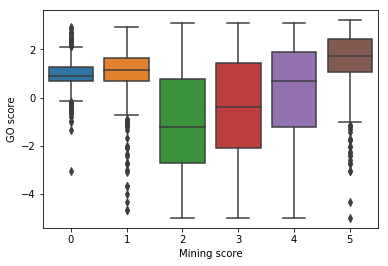

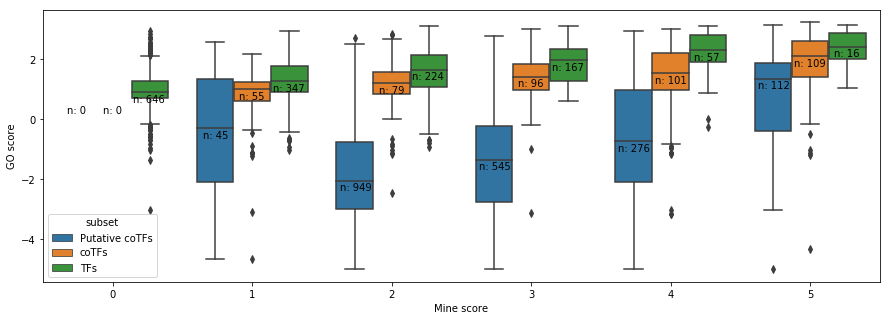

In [7]:
sns.boxplot(x = 'Mine score', y = 'GO score', data = list_df)
plt.xlabel('Mining score')
plt.savefig('Figures/015_GO_vs_mining_score_full_list_boxplots.jpg', dpi = dpi)
plt.show()

subdfs2 = (
    list_df.loc[(list_df['In_bait_gocofs'] == 0) & (list_df['Is_TF'] == 0)],
    list_df.loc[list_df['In_bait_gocofs'] == 1],
    list_df.loc[list_df['Is_TF'] == 1]
)

titles2 = (
    'Putative coTFs',
    'coTFs',
    'TFs'
)

def subset_minimalize_add_idd4(subdf, subset_name):
    subdf = subdf.loc[:, ['GO score', 'Mine score']]
    subdf['subset'] = subset_name
    return subdf

subdfs_minimal4 = [subset_minimalize_add_idd4(subdf, title) for subdf, title in zip(subdfs2, titles2)]
all_scores4 = pd.concat(subdfs_minimal4)
plt.figure(figsize = (15, 5))
ax = sns.boxplot(x = 'Mine score', y = 'GO score', data = all_scores4, hue = 'subset')

nobs_groupby = all_scores4.groupby(['Mine score', 'subset'])
nobs = nobs_groupby.apply(lambda x: 'n: {}'.format(len(x)))
medians = nobs_groupby['GO score'].median()
for tick, label in enumerate(ax.get_xticklabels()):
    ax_mine = int(label.get_text())
    
    for j, ax_subset in enumerate(ax.get_legend_handles_labels()[1]):
        x_offset = (j - 1) * 0.26
        
        num = nobs.get(ax_mine).get(ax_subset, 'n: 0')
        
        median = medians.get(ax_mine).get(ax_subset, 0.5)
        
        ax.text(tick + x_offset, median - 0.32, num,
                    horizontalalignment='center', color='black')
plt.savefig('Figures/016_GO_vs_mining_score_subsets_coregs_tfs_unnanotated_boxplots.jpg', dpi = lower_dpi)
plt.show()

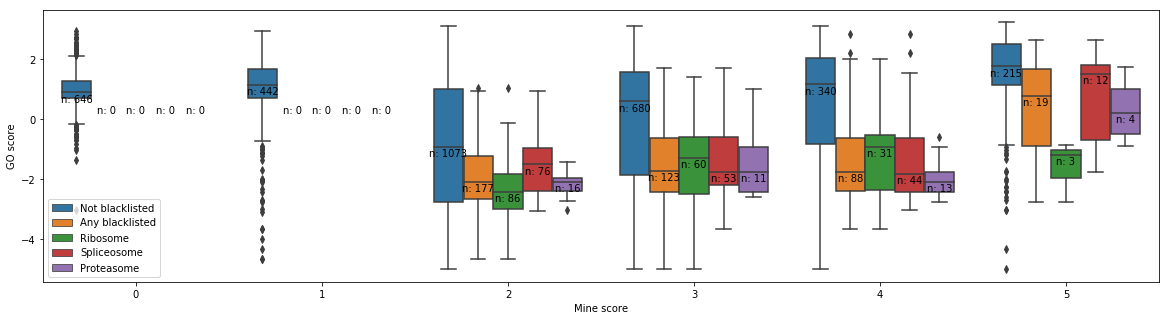

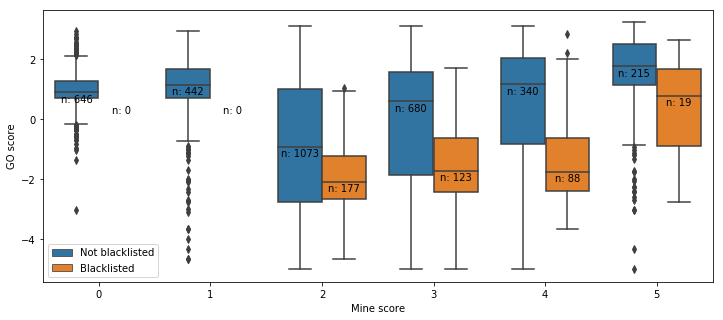

In [8]:
def subset_minimalize_add_idd5(subdf, subset_name):
    subdf = subdf.loc[:, ['GO score', 'Mine score']]
    subdf['subset'] = subset_name
    return subdf

subdfs3 = (
    list_df.loc[(list_df['Blacklist any'] == 0)],
    list_df.loc[list_df['Blacklist any'] == 1],
    list_df.loc[list_df['Blacklist ribosome'] == 1],
    list_df.loc[list_df['Blacklist spliceosome'] == 1],
    list_df.loc[list_df['Blacklist proteasome'] == 1]
)

titles3 = (
    'Not blacklisted',
    'Any blacklisted',
    'Ribosome',
    'Spliceosome',
    'Proteasome'
)

subdfs_minimal5 = [subset_minimalize_add_idd5(subdf, title) for subdf, title in zip(subdfs3, titles3)]
all_scores5 = pd.concat(subdfs_minimal5)
plt.figure(figsize = (20, 5))
ax = sns.boxplot(x = 'Mine score', y = 'GO score', data = all_scores5, hue = 'subset', )
ax.legend(loc = 'lower left')

nobs_groupby = all_scores5.groupby(['Mine score', 'subset'])
nobs = nobs_groupby.apply(lambda x: 'n: {}'.format(len(x)))
medians = nobs_groupby['GO score'].median()
for tick, label in enumerate(ax.get_xticklabels()):
    ax_mine = int(label.get_text())
    
    for j, ax_subset in enumerate(ax.get_legend_handles_labels()[1]):
        x_offset = (j - 2) * 0.16
        
        num = nobs.get(ax_mine).get(ax_subset, 'n: 0')
        
        median = medians.get(ax_mine).get(ax_subset, 0.5)
        
        ax.text(tick + x_offset, median - 0.32, num,
                    horizontalalignment='center', color='black')
plt.savefig('Figures/017_GO_vs_mining_score_subsets_with(out)blacklist_boxplots.jpg', dpi = lower_dpi)
plt.show()


def subset_minimalize_add_idd5(subdf, subset_name):
    subdf = subdf.loc[:, ['GO score', 'Mine score']]
    subdf['subset'] = subset_name
    return subdf

subdfs3 = (
    list_df.loc[(list_df['Blacklist any'] == 0)],
    list_df.loc[list_df['Blacklist any'] == 1]
)

titles3 = (
    'Not blacklisted',
    'Blacklisted'
)

subdfs_minimal5 = [subset_minimalize_add_idd5(subdf, title) for subdf, title in zip(subdfs3, titles3)]
all_scores5 = pd.concat(subdfs_minimal5)
plt.figure(figsize = (12, 5))
ax = sns.boxplot(x = 'Mine score', y = 'GO score', data = all_scores5, hue = 'subset', )
ax.legend(loc = 'lower left')

nobs_groupby = all_scores5.groupby(['Mine score', 'subset'])
nobs = nobs_groupby.apply(lambda x: 'n: {}'.format(len(x)))
medians = nobs_groupby['GO score'].median()
for tick, label in enumerate(ax.get_xticklabels()):
    ax_mine = int(label.get_text())
    
    for j, ax_subset in enumerate(ax.get_legend_handles_labels()[1]):
        x_offset = (j - 0.5) * 0.4
        
        num = nobs.get(ax_mine).get(ax_subset, 'n: 0')
        
        median = medians.get(ax_mine).get(ax_subset, 0.5)
        
        ax.text(tick + x_offset, median - 0.32, num,
                    horizontalalignment='center', color='black')
plt.savefig('Figures/018_GO_vs_mining_score_subsets_with(out)blacklist_boxplots.jpg', dpi = lower_dpi)
plt.show()

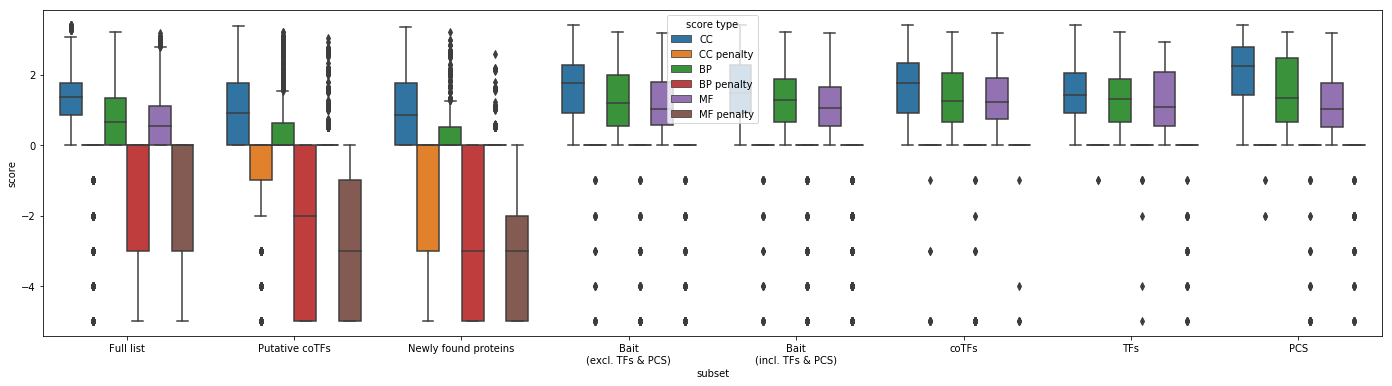

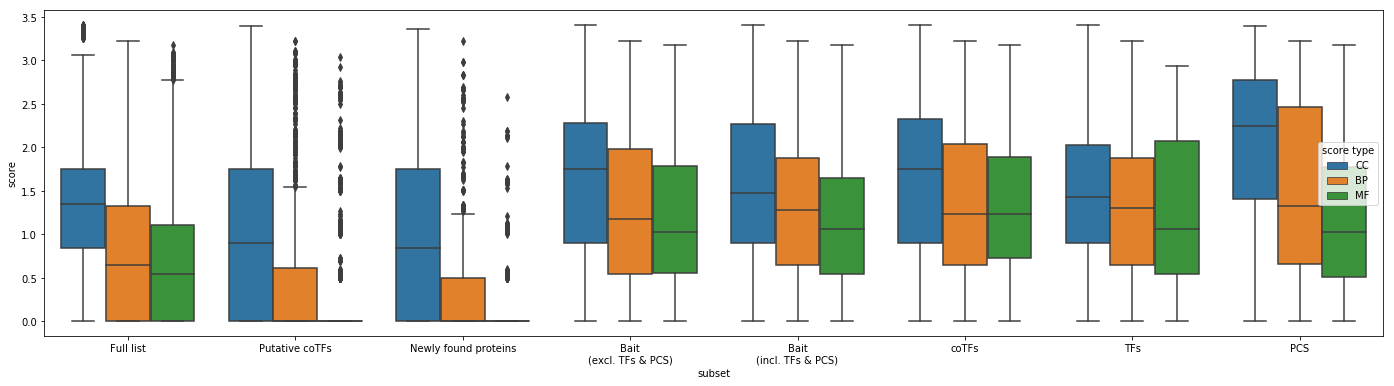

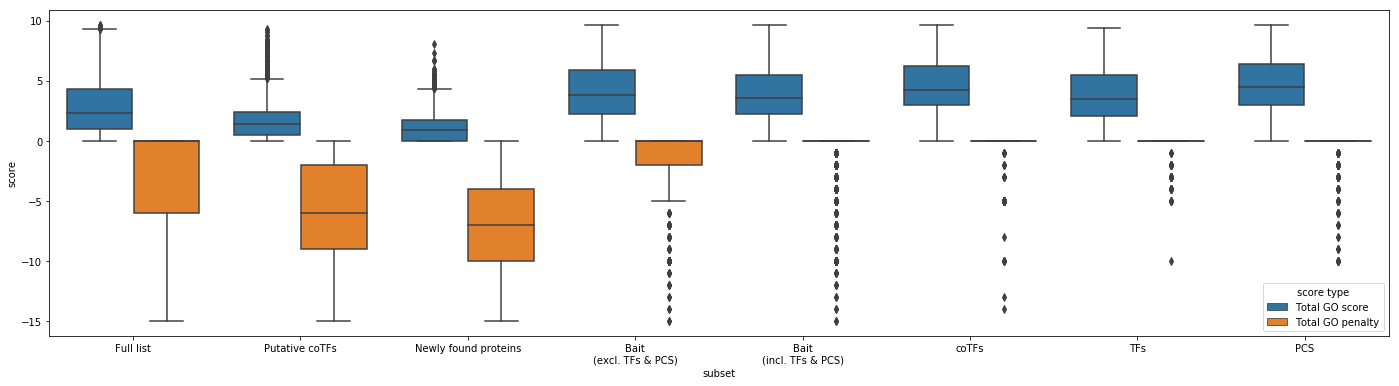

In [9]:
def subset_minimalize_add_idd2(subdf, subset_name):
    subdf = subdf.loc[:, ['CC GO score', 'CC GO score penalty', 'BP GO score', 'BP GO score penalty', 'MF GO score', 'MF GO score penalty']]
    subdf['subset'] = subset_name
    cc = subdf.loc[:,['CC GO score', 'subset']]
    cc_p = subdf.loc[:,['CC GO score penalty', 'subset']]
    bp = subdf.loc[:,['BP GO score', 'subset']]
    bp_p = subdf.loc[:,['BP GO score penalty', 'subset']]
    mf = subdf.loc[:,['MF GO score', 'subset']]
    mf_p = subdf.loc[:,['MF GO score penalty', 'subset']]
    for df, name in zip([cc, cc_p, bp, bp_p, mf, mf_p], ['CC', 'CC penalty', 'BP', 'BP penalty', 'MF', 'MF penalty']):
        df['score type'] = name
        df.columns = ['score', 'subset', 'score type']
    outdf = pd.concat([cc, cc_p, bp, bp_p, mf, mf_p])
    return outdf

subdfs_minimal2 = [subset_minimalize_add_idd2(subdf, title) for subdf, title in zip(subdfs, titles)]
all_scores2 = pd.concat(subdfs_minimal2)
plt.figure(figsize = (24, 6))
sns.boxplot(x = 'subset', y = 'score', data = all_scores2, hue = 'score type')
plt.savefig('Figures/019_All_subsets_all_subscores_boxplots.jpg', dpi = lower_dpi)
plt.show()

def subset_minimalize_add_idd4(subdf, subset_name):
    subdf = subdf.loc[:, ['CC GO score', 'CC GO score penalty', 'BP GO score', 'BP GO score penalty', 'MF GO score', 'MF GO score penalty']]
    subdf['subset'] = subset_name
    cc = subdf.loc[:,['CC GO score', 'subset']]
    bp = subdf.loc[:,['BP GO score', 'subset']]
    mf = subdf.loc[:,['MF GO score', 'subset']]
    for df, name in zip([cc, bp, mf], ['CC', 'BP', 'MF']):
        df['score type'] = name
        df.columns = ['score', 'subset', 'score type']
    outdf = pd.concat([cc, bp, mf])
    return outdf

subdfs_minimal4 = [subset_minimalize_add_idd4(subdf, title) for subdf, title in zip(subdfs, titles)]
all_scores4 = pd.concat(subdfs_minimal4)
plt.figure(figsize = (24, 6))
sns.boxplot(x = 'subset', y = 'score', data = all_scores4, hue = 'score type')
plt.savefig('Figures/020_All_subsets_aspect_scores_boxplots.jpg', dpi = lower_dpi)
plt.show()

def subset_minimalize_add_idd3(subdf, subset_name):
    subdf = subdf.loc[:, ['Total GO score', 'Total GO score penalty']]
    subdf['subset'] = subset_name
    score = subdf.loc[:,['Total GO score', 'subset']]
    penalty = subdf.loc[:,['Total GO score penalty', 'subset']]
    for df, name in zip([score, penalty], ['Total GO score', 'Total GO penalty']):
        df['score type'] = name
        df.columns = ['score', 'subset', 'score type']
    outdf = pd.concat([score, penalty])
    return outdf

subdfs_minimal3 = [subset_minimalize_add_idd3(subdf, title) for subdf, title in zip(subdfs, titles)]
all_scores3 = pd.concat(subdfs_minimal3)
plt.figure(figsize = (24, 6))
sns.boxplot(x = 'subset', y = 'score', data = all_scores3, hue = 'score type')
plt.savefig('Figures/021_All_subsets_GO_positive_and_penalty_scores_boxplots.jpg', dpi = lower_dpi)
plt.show()

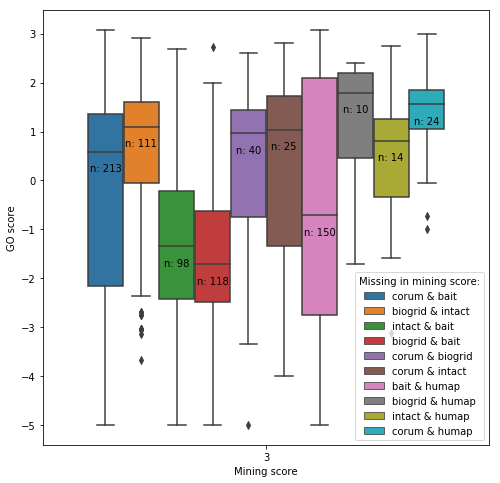

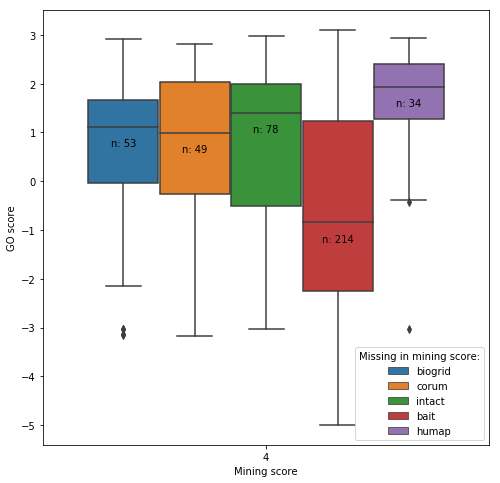

In [10]:
in_humap = list_df['ComplexID_huMAP'].notnull().astype('int')
in_corum = list_df['ComplexID_CORUM'].notnull().astype('int')
in_biogrid = list_df['Interaction_TF_BioGRID']
in_intact = list_df['Interaction_TF_IntACT']
in_bait = (list_df['In_bait_crems'] |
    list_df['In_bait_snfs'] |
    list_df['In_bait_nursa'] |
    list_df['In_bait_gocofs'] |
    list_df['In_NVS'])
scores_df = pd.DataFrame({'humap' : in_humap, 'corum' : in_corum, 'biogrid' : in_biogrid, 'intact' : in_intact, 'bait' : in_bait})
scores_df['Mine_missing'] = [set() for _ in range(len(scores_df))]

for index, row in scores_df.iterrows():
    for col in scores_df.columns[:-1]:
        if row[col] == 0:
            row['Mine_missing'].add(col)

scores_df['Mine_missing'] = scores_df['Mine_missing'].map(lambda x: ' & '.join(x))
list_df['Mine_missing'] = list(scores_df['Mine_missing'])

for full_df in [list_df]:
    for minescore in range(3, 5):
        part_df = full_df.loc[full_df['Mine score'] == minescore]
        plt.figure(figsize = (8, 8))
        ax = sns.boxplot(x = 'Mine score', y = 'GO score', hue = 'Mine_missing', data = part_df)
        nobs_groupby = part_df.groupby(['Mine score', 'Mine_missing'])
        nobs = nobs_groupby.apply(lambda x: 'n: {}'.format(len(x)))
        medians = nobs_groupby['GO score'].median()

        for tick, label in enumerate(ax.get_xticklabels()):
            ax_mine = int(label.get_text())

            for j, ax_minemissing in enumerate(ax.get_legend_handles_labels()[1]):
                if minescore == 3:
                    x_offset = (j - 4.5) * 0.08
                else:
                    x_offset = (j - 2) * 0.16
                
                num = nobs[ax_mine, ax_minemissing]
                median = medians[ax_mine, ax_minemissing]
                ax.text(tick + x_offset, median - 0.4, num,
                            horizontalalignment='center', color='black')
        plt.xlabel('Mining score')
        plt.legend(title = 'Missing in mining score:', loc = 'lower right')
        plt.savefig('Figures/0{}_GO_vs_missing_in_mining_score_{}_boxplots.jpg'.format(minescore + 19, minescore), dpi = dpi)
        plt.show()